In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('data_for_lr.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [4]:
print(data.shape)
data = data.dropna()
data.shape  

(700, 2)


(699, 2)

In [5]:
train_input = np.array(data['x'].loc[0:500]).reshape(500,1)
train_output = np.array(data.y.loc[0:500]).reshape(500,1)

test_input = np.array(data['x'].loc[501:]).reshape(199,1)
test_output = np.array(data.y.loc[501:]).reshape(199,1)

In [6]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


<font color="green">Linear Regression</font>

Forward propogation

f(x) = m*x + c ; where m and c are the parameters that or model will learn through training.

In [7]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

Cost function

summation(1/2n * (y-f(x))^2)

In [8]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5
    return cost

Gradient Descent for Backpropogation

df = (f(x) -y)/n ,
dm = df * x ,
dc = df * 1

In [9]:
def backward_propogation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

Update Parameters

m = m - (learning_rate * dm) ,  
c = c - (learning_rate * dc)

In [10]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

MODEL TRAINING

In [11]:
def train(train_input, train_output, learning_rate, iterations):
    # random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    plt.figure()
    loss = list()

    # iterations
    for i in range(iterations):
        predictions = forward_propagation(train_input, parameters)
        cost = cost_function(predictions, train_output)

        loss.append(cost)
        print('iteration: {}, loss: {}'.format(i+1, cost))
        fig ,ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label="Original")
        ax.plot(train_input, predictions, '*', label="Training")
        legend = ax.legend()
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')
        plt.show()


        derivatives = backward_propogation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)

        
    
    return parameters, loss

Training

iteration: 1, loss: 5.2508166313430245


<Figure size 640x480 with 0 Axes>

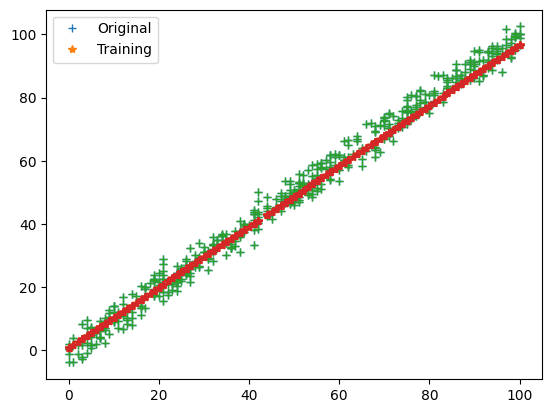

iteration: 2, loss: 4.57605430069174


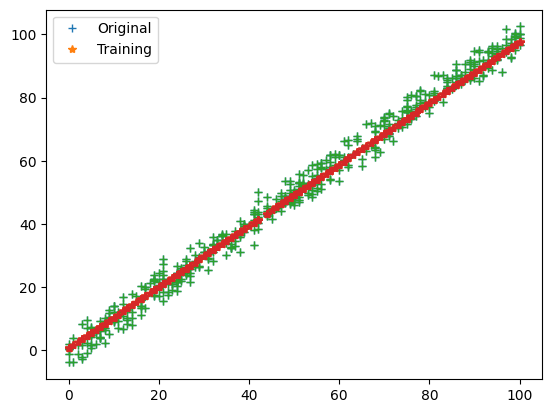

iteration: 3, loss: 4.269910986031001


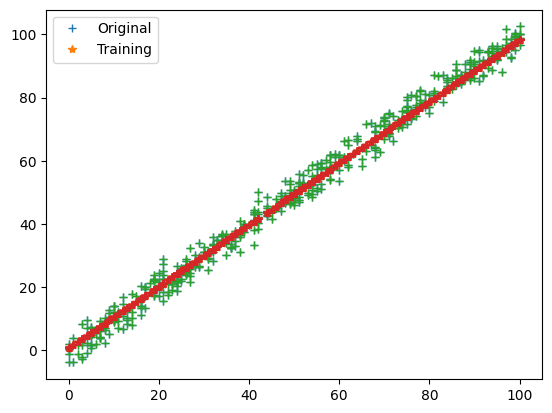

iteration: 4, loss: 4.131010527368762


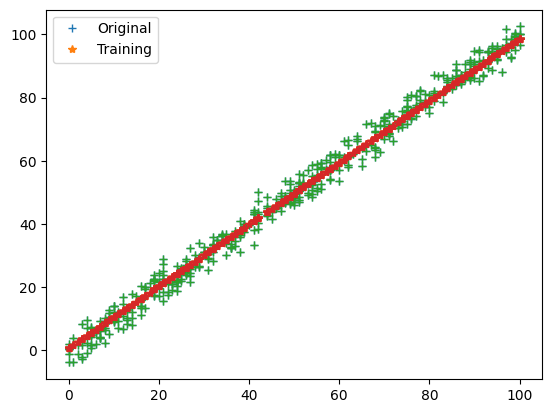

iteration: 5, loss: 4.067988337864084


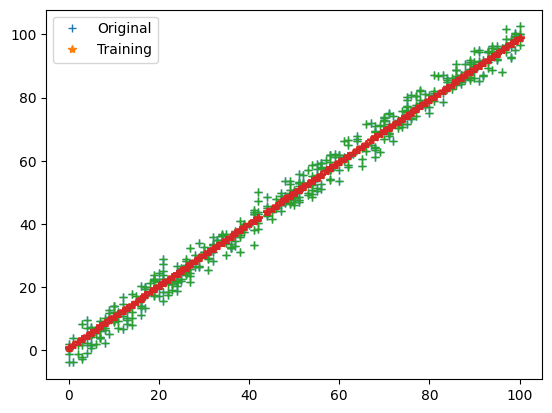

iteration: 6, loss: 4.039392203268056


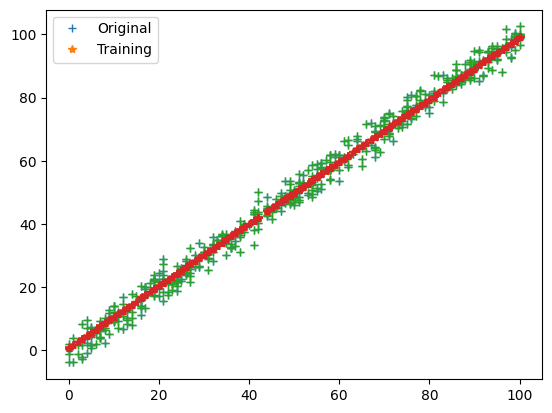

iteration: 7, loss: 4.026415208061749


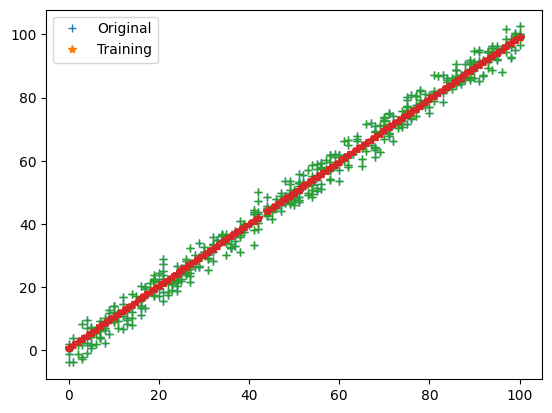

iteration: 8, loss: 4.020524633842907


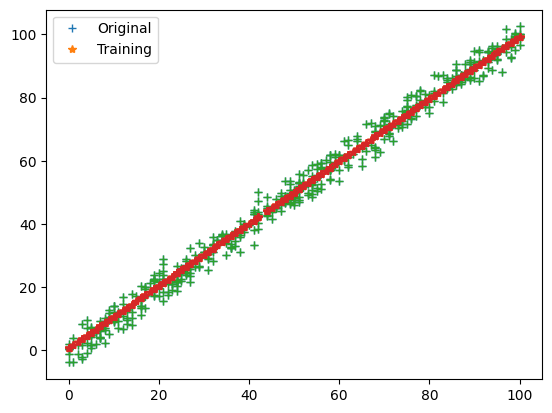

iteration: 9, loss: 4.017849176821228


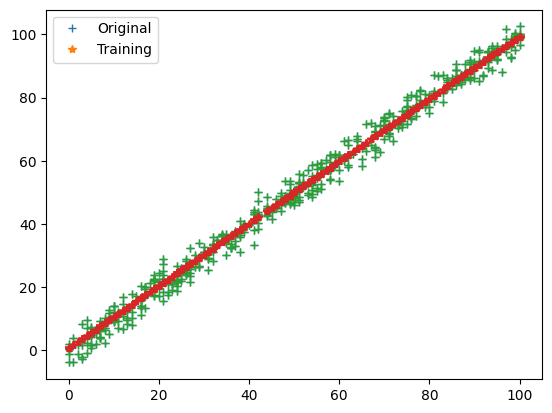

iteration: 10, loss: 4.016632422179027


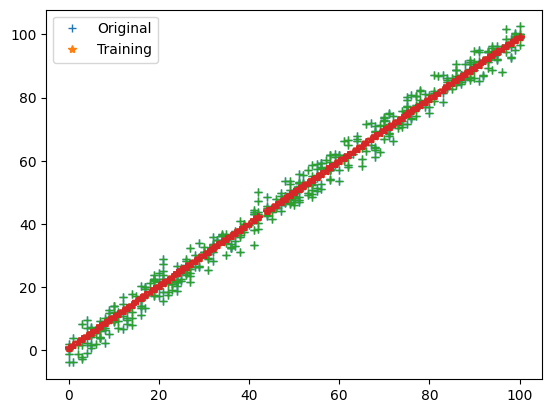

iteration: 11, loss: 4.016077482568038


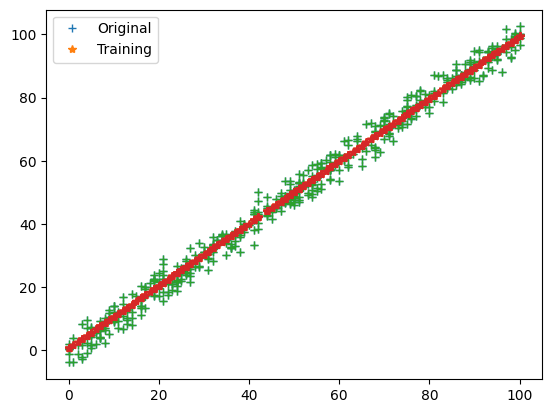

iteration: 12, loss: 4.015822809315679


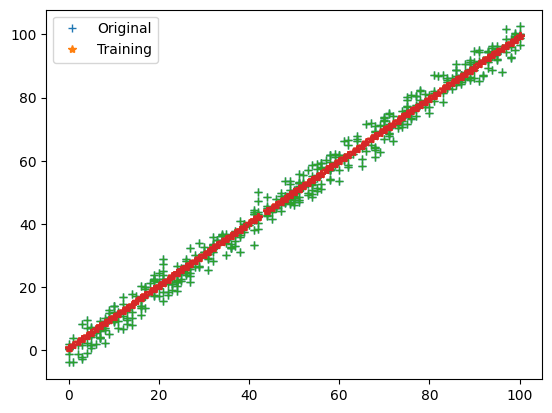

iteration: 13, loss: 4.015704367388724


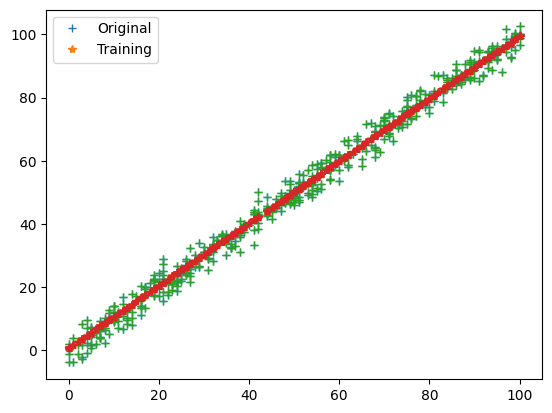

iteration: 14, loss: 4.015647733910904


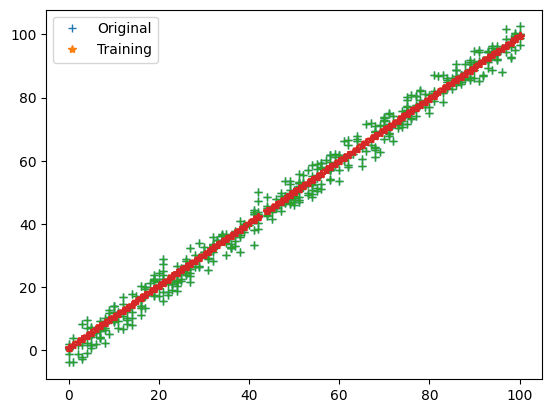

iteration: 15, loss: 4.0156191431408095


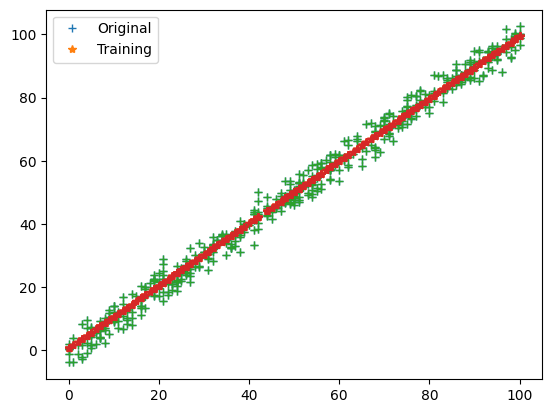

iteration: 16, loss: 4.015603275524159


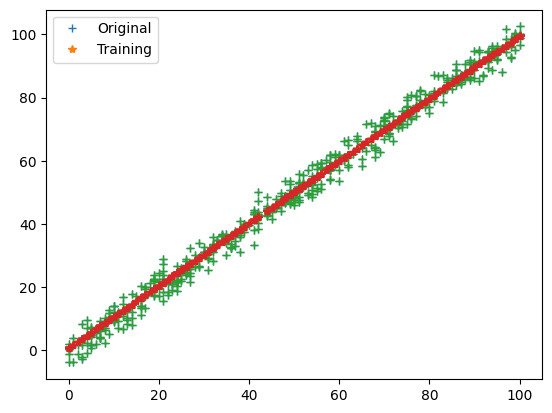

iteration: 17, loss: 4.015593180562195


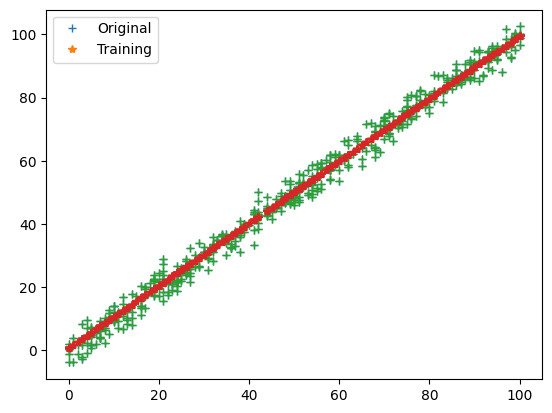

iteration: 18, loss: 4.015585704805931


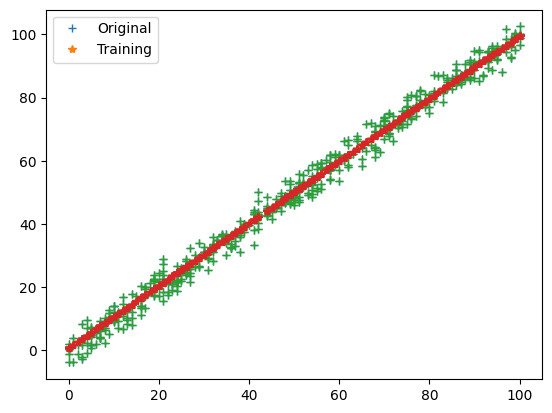

iteration: 19, loss: 4.015579417532055


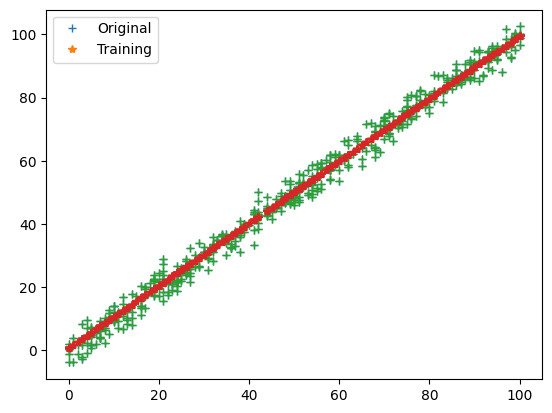

iteration: 20, loss: 4.015573669619813


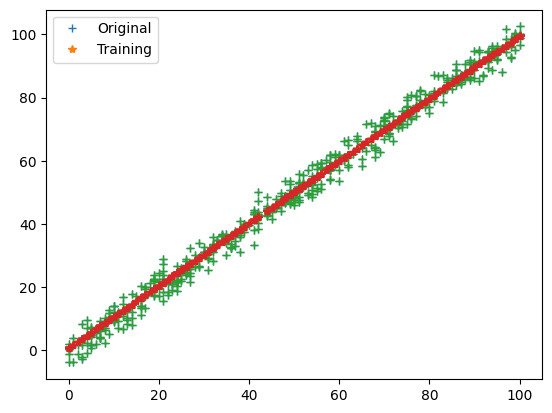

In [12]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [13]:
print(parameters, loss[-1],sep="\n")

{'m': 0.9871514505354365, 'c': 0.6778700350754935}
4.015573669619813


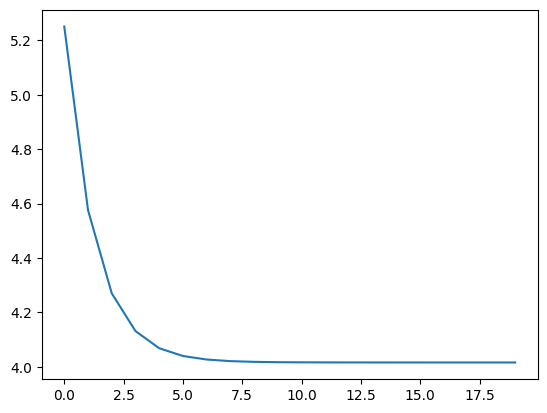

In [14]:
plt.plot(loss)

## Let's Predict

In [15]:
test_predictions = test_input * parameters['m'] + parameters['c']

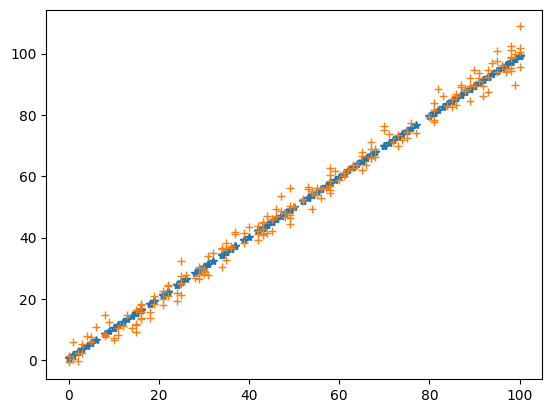

In [16]:
plt.plot(test_input, test_predictions, '*')
plt.plot(test_input, test_output, '+')
plt.show()

### Cost of prediction

In [17]:
cost_function(test_predictions, test_output)

4.0179123756178985

# Using ScikitLearn library

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model = LinearRegression()
lr_model.fit(train_input, train_output)  # it checks for previos iterations and then fits the model

LinearRegression()

In [23]:
print(lr_model.coef_, lr_model.intercept_, sep="\n") # m and c

[[1.0009993]]
[-0.23603461]


### Predict

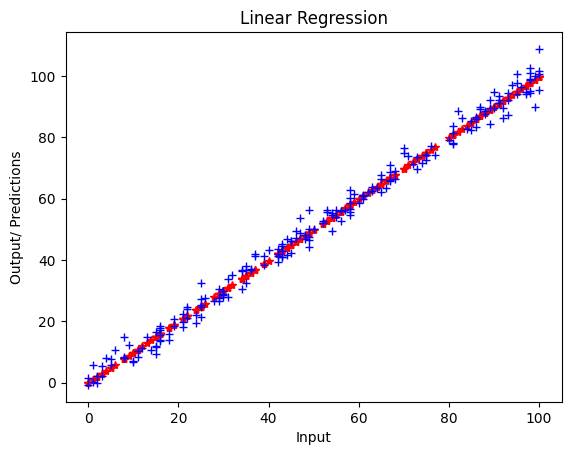

In [25]:
test_predictions = lr_model.predict(test_input)
plt.plot(test_input, test_predictions, '*', color='red')
plt.plot(test_input, test_output, '+', color='blue')
plt.xlabel('Input')
plt.ylabel('Output/ Predictions')
plt.title('Linear Regression')
plt.show()

### Cost

In [26]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(test_output, test_predictions)
cost

8.030031591835375